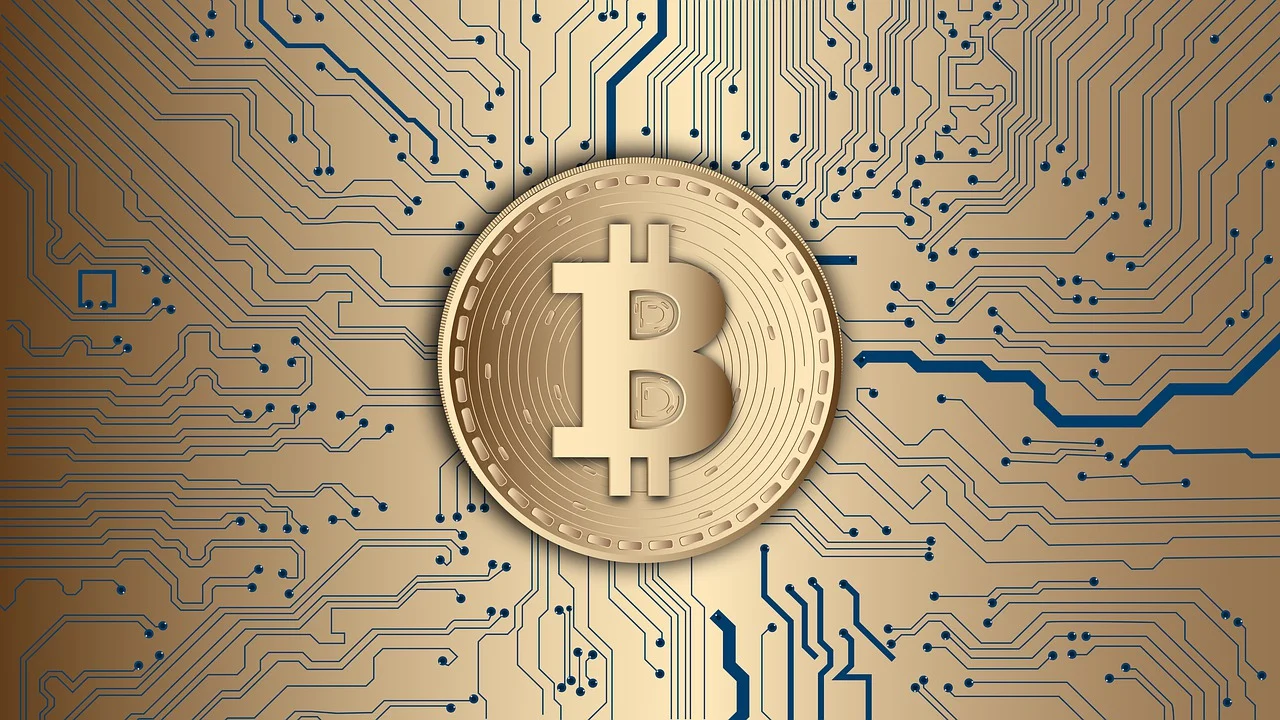

This is historical data about Bitcoin, including its price and market data, covering a period from September 20, 2023, to November 21, 2023.


1. Data Overview: Provide a summary of the data, including the types of data columns and a preview of the first few rows.
2. Price Analysis: Analyze the price trends of Bitcoin during this period.
3. Volume Analysis: Examine the trading volume and its correlation with price changes.
4. Statistical Analysis: Calculate key statistics like average, median, high, low, and standard deviation of price and volume.
5. Graphical Representation: Create charts to visually represent trends in the data.
6. Custom Analysis: Any specific analysis or questions you have in mind.




# input data

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

import random
#from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.feature_selection import SelectFromModel

In [ ]:
import csv
from collections import defaultdict

columns = defaultdict(list)
with open('Bitcoin_historical_data.csv', 'r') as f:
    reader = csv.reader(f, delimiter=';')
    for row in reader:
        for i in range(len(row)):
            columns[i].append(row[i])
# Following line is only necessary if you want a key error for invalid column numbers
#columns = dict(columns)

In [ ]:
ds=pd.DataFrame(columns)

In [ ]:
new_header = ds.iloc[0] #grab the first row for the header
ds = ds[1:] #take the data less the header row
ds.columns = new_header #set the header row as the df header

In [ ]:
ds.head(10)

,﻿timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
1,2023-11-20T00:00:00.000Z,2023-11-20T23:59:59.999Z,2023-11-20T17:52:00.000Z,2023-11-20T14:12:00.000Z,37374.0746847021,37756.8192892406,36882.5319812888,37476.9558592879,20888209067.56,732607478252.01,2023-11-20T23:59:59.999Z
2,2023-11-19T00:00:00.000Z,2023-11-19T23:59:59.999Z,2023-11-19T23:43:00.000Z,2023-11-19T14:16:00.000Z,36585.7656994176,37509.3562598784,36414.5982759999,37386.547774872,12915986552.51,730802775303.56,2023-11-19T23:59:59.999Z
3,2023-11-18T00:00:00.000Z,2023-11-18T23:59:59.999Z,2023-11-18T16:13:00.000Z,2023-11-18T07:05:00.000Z,36625.3714763297,36839.2828685121,36233.3117312511,36585.7029298644,11886022717.42,715107332423.29,2023-11-18T23:59:59.999Z
4,2023-11-17T00:00:00.000Z,2023-11-17T23:59:59.999Z,2023-11-17T23:09:00.000Z,2023-11-17T14:56:00.000Z,36164.8236042335,36704.4828037394,35901.2355630271,36596.6819231214,22445028429.93,715288296429.98,2023-11-17T23:59:59.999Z
5,2023-11-16T00:00:00.000Z,2023-11-16T23:59:59.999Z,2023-11-16T00:07:00.000Z,2023-11-16T19:40:00.000Z,37879.9799370366,37934.625198059,35545.473342881,36154.7692413685,26007385365.73,706617161805.01,2023-11-16T23:59:59.999Z
6,2023-11-15T00:00:00.000Z,2023-11-15T23:59:59.999Z,2023-11-15T23:57:00.000Z,2023-11-15T02:20:00.000Z,35548.1127933703,37964.8928323147,35383.7809668933,37880.5831724307,27365821678.5,740312548128.35,2023-11-15T23:59:59.999Z
7,2023-11-14T00:00:00.000Z,2023-11-14T23:59:59.999Z,2023-11-14T08:19:00.000Z,2023-11-14T18:54:00.000Z,36491.787577554,36753.3521876241,34948.5002761446,35537.6405155251,23857403554.48,694491212462.29,2023-11-14T23:59:59.999Z
8,2023-11-13T00:00:00.000Z,2023-11-13T23:59:59.999Z,2023-11-13T01:18:00.000Z,2023-11-13T21:37:00.000Z,37070.3058713039,37405.1152995046,36399.6051113486,36502.3573373281,19057712790.07,713311947480.48,2023-11-13T23:59:59.999Z
9,2023-11-12T00:00:00.000Z,2023-11-12T23:59:59.999Z,2023-11-12T15:46:00.000Z,2023-11-12T00:50:00.000Z,37133.9908846586,37227.6925577401,36779.1165342627,37054.5201429095,11545715998.89,724074263172.69,2023-11-12T23:59:59.999Z
10,2023-11-11T00:00:00.000Z,2023-11-11T23:59:59.999Z,2023-11-11T00:30:00.000Z,2023-11-11T22:15:00.000Z,37310.070760187,37407.0932751349,36773.6664564109,37138.0505408954,13924272141.51,725668445884.77,2023-11-11T23:59:59.999Z


In [ ]:
ds['timestamp'] = pd.to_datetime(ds['timestamp'])
ds['open']=ds['open'].astype('float64')
ds['high']=ds['high'].astype('float64')
ds['low']=ds['low'].astype('float64')
ds['close']=ds['close'].astype('float64')
ds['volume']=ds['volume'].astype('float64')
ds['marketCap']=ds['marketCap'].astype('float64')

In [ ]:
df=ds.loc[:,'open':'timestamp']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 1 to 60
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   open       60 non-null     float64            
 1   high       60 non-null     float64            
 2   low        60 non-null     float64            
 3   close      60 non-null     float64            
 4   volume     60 non-null     float64            
 5   marketCap  60 non-null     float64            
 6   timestamp  60 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 3.4 KB


# Data visualization

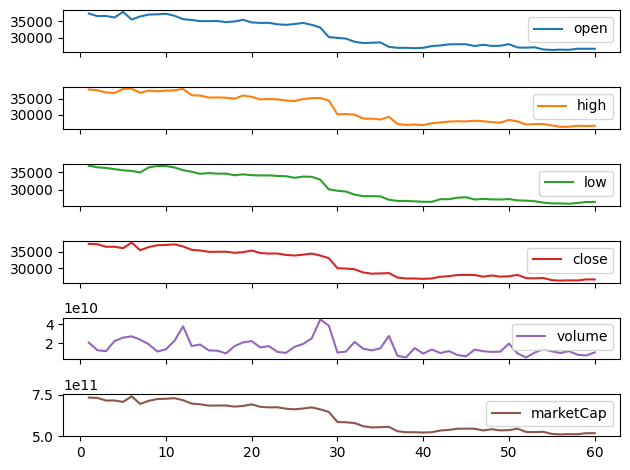

In [ ]:
df.loc[:,'open':'marketCap'].plot(subplots=True)
plt.xlabel("")
plt.tight_layout()
plt.show()

In [ ]:
df.shape


(60, 7)

In [ ]:
df.describe()

,open,high,low,close,volume,marketCap
count,60.000000,60.000000,60.000000,60.000000,6.000000e+01,6.000000e+01
mean,31242.306665,31819.965964,30888.049564,31421.910807,1.579797e+10,6.134396e+11
std,4161.406786,4290.194194,4006.038449,4191.952910,7.985167e+09,8.232132e+10
min,26209.498349,26389.884785,26011.469616,26217.249336,5.331173e+09,5.111512e+11
25%,27334.713717,27703.684268,27089.128682,27409.688866,1.054569e+10,5.346601e+11
50%,29801.018426,30243.457380,29601.032882,29956.154096,1.320419e+10,5.847663e+11
75%,35058.348480,35619.052763,34599.855267,35170.961211,1.951866e+10,6.869817e+11
max,37879.979937,37964.892832,36882.531981,37880.583172,4.493500e+10,7.403125e+11


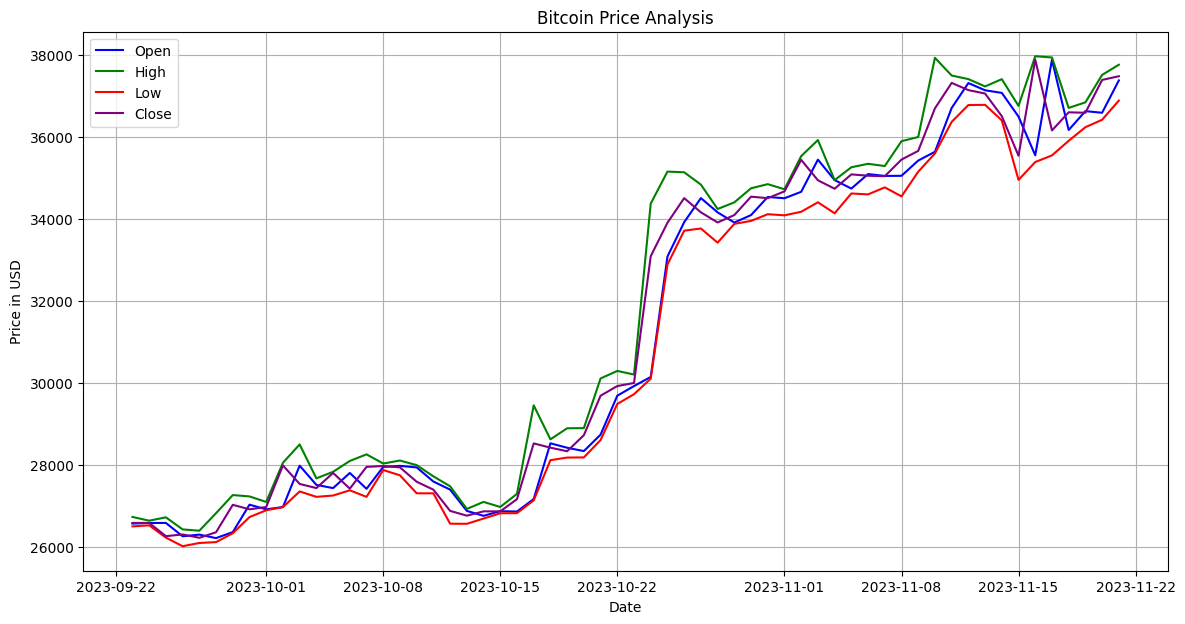

In [ ]:
import matplotlib.pyplot as plt


# Price Analysis - Plotting the Open, High, Low, and Close prices
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['open'], label='Open', color='blue')
plt.plot(df['timestamp'], df['high'], label='High', color='green')
plt.plot(df['timestamp'], df['low'], label='Low', color='red')
plt.plot(df['timestamp'], df['close'], label='Close', color='purple')

plt.title('Bitcoin Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()


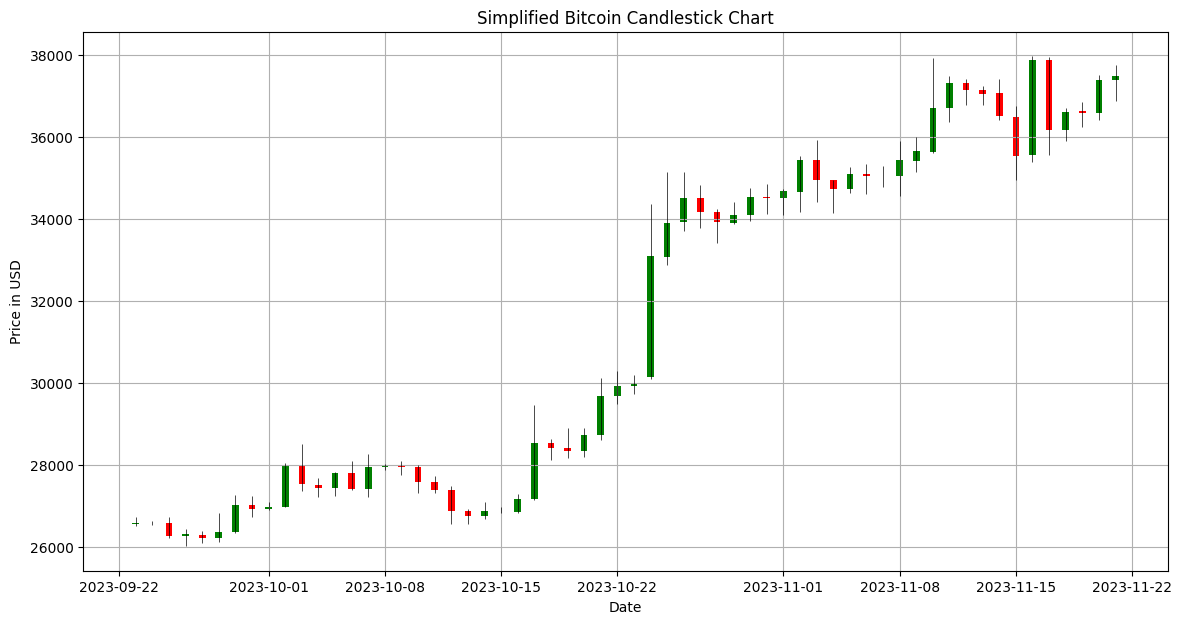

In [ ]:
# Creating a simplified candlestick-like chart using matplotlib

plt.figure(figsize=(14,7))

# Define up and down prices
up = df[df['close'] >= df['open']]
down = df[df['close'] < df['open']]

# Plotting: green for days closing higher than the opening, red for days closing lower
plt.bar(up['timestamp'], up['close'] - up['open'], bottom=up['open'], color='green', width=0.4)
plt.bar(down['timestamp'], down['close'] - down['open'], bottom=down['open'], color='red', width=0.4)

# Adding high and low prices as lines
plt.vlines(df['timestamp'], ymin=df['low'], ymax=df['high'], color='black', linewidth=0.5)

plt.title('Simplified Bitcoin Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid(True)
plt.show()


# Statistical models

## ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Test for Stationarity with Augmented Dickey-Fuller test
result = adfuller(df['close'])

# Output the results
adf_statistic, p_value = result[0], result[1]

adf_statistic, p_value


(-0.9374300312579004, 0.7753964691380812)

In [ ]:
# Differencing the data to achieve stationarity
df['close_diff'] = df['close'].diff()

# Dropping the NaN values that result from differencing
df = df.dropna()

# Retest for Stationarity with the differenced data
result_diff = adfuller(df['close_diff'])

# Output the results of the differenced data
adf_statistic_diff, p_value_diff = result_diff[0], result_diff[1]

adf_statistic_diff, p_value_diff


(-8.743294165700197, 2.968713292413084e-14)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Function to calculate AIC for different combinations of ARIMA parameters
def calculate_aic(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit.aic

# Range of parameters to test
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Storing the results
results = []

# Testing different combinations of p, d, and q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                aic = calculate_aic(df['close_diff'], (p, d, q))
                results.append({'p': p, 'd': d, 'q': q, 'AIC': aic})
            except:
                continue

# Sorting the results by AIC
sorted_results = sorted(results, key=lambda x: x['AIC'])

# Displaying the best few combinations
sorted_results[:5]  # Displaying top 5 combinations with lowest AIC


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

[{'p': 0, 'd': 1, 'q': 1, 'AIC': 931.9809433470521},
 {'p': 1, 'd': 1, 'q': 1, 'AIC': 932.7962404341127},
 {'p': 0, 'd': 1, 'q': 2, 'AIC': 932.9522810576661},
 {'p': 2, 'd': 1, 'q': 1, 'AIC': 934.6054640013684},
 {'p': 1, 'd': 1, 'q': 2, 'AIC': 934.7033659378042}]

In [ ]:
# Fitting the ARIMA(0, 1, 1) model to the data
model = ARIMA(df['close_diff'], order=(0, 1, 1))
model_fit = model.fit()

# Forecasting the next 5 days
forecast = model_fit.forecast(steps=10)

# Displaying the forecasted values
forecast


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

59   -183.640025
60   -183.640025
61   -183.640025
62   -183.640025
63   -183.640025
64   -183.640025
65   -183.640025
66   -183.640025
67   -183.640025
68   -183.640025
Name: predicted_mean, dtype: float64

<ipython-input-22-26ffbb74957f>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=df.index[-1], periods=11, closed='right')


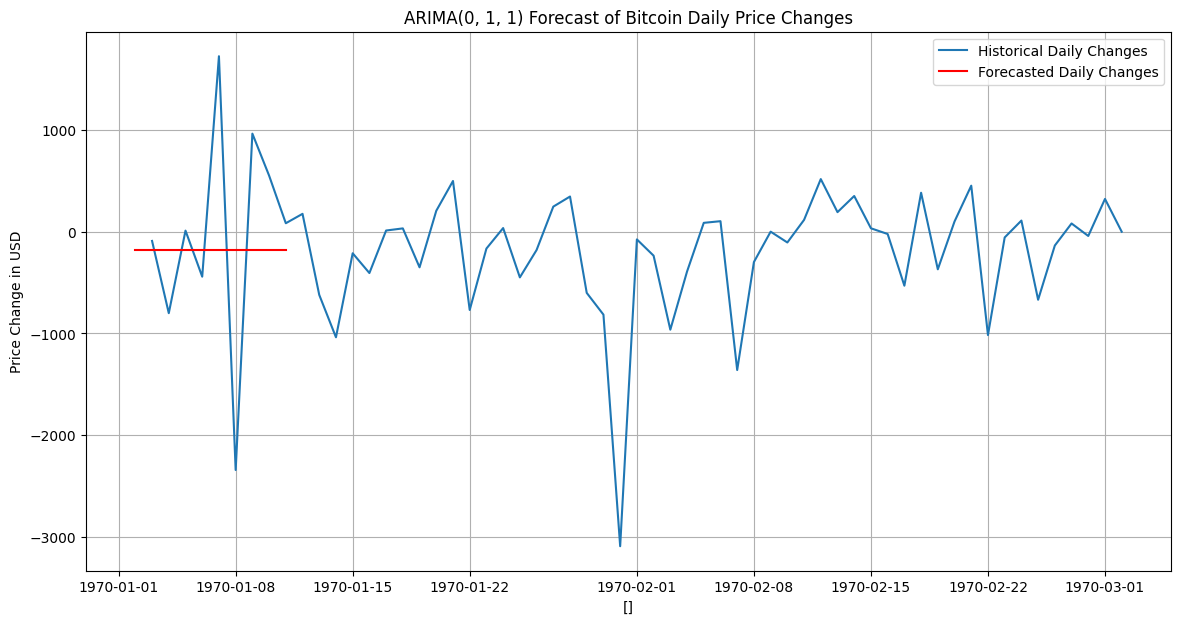

In [ ]:
# Generating a date range for the forecast period
forecast_dates = pd.date_range(start=df.index[-1], periods=11, closed='right')

# Creating a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Forecasted Change': forecast.values}, index=forecast_dates)

# Plotting the forecast alongside the original data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close_diff'], label='Historical Daily Changes')
plt.plot(forecast_df.index, forecast_df['Forecasted Change'], label='Forecasted Daily Changes', color='red')

plt.title('ARIMA(0, 1, 1) Forecast of Bitcoin Daily Price Changes')
plt.xlabel('Date')
plt.ylabel('Price Change in USD')
plt.legend()
plt.grid(True)
plt.show()


## Moving average

Moving Averages: We'll calculate both Simple Moving Averages (SMA) and Exponential Moving Averages (EMA) for the Bitcoin closing prices.

Volatility Analysis: We'll measure the volatility of Bitcoin prices using the standard deviation. The GARCH model is more complex and might be overkill for this brief analysis.

Correlation Analysis: We'll assess the correlation between Bitcoin's trading volume and its price movements.

Regression Analysis: We'll apply linear regression to understand and predict the relationship between Bitcoin's volume and its closing price.

Let's start with the Moving Averages. We'll calculate the SMA and EMA for a couple of different periods (e.g., 10-day, 20-day) to analyze short-term and mid-term trends.



The chart displays the closing price of Bitcoin alongside its Simple Moving Averages (SMA) and Exponential Moving Averages (EMA) for both 10-day and 20-day periods. The SMAs and EMAs help in identifying the trend direction and potential trend reversals. Generally, when the price is above these averages, it indicates a bullish trend, and when below, it suggests a bearish trend.

Next, let's conduct the Volatility Analysis. We'll calculate the standard deviation of Bitcoin's daily price changes over this period to measure its volatility. ​​

The standard deviation of Bitcoin's daily price changes, which serves as a measure of its volatility, is approximately $697.83. This value indicates the average amount by which Bitcoin's price has varied from its mean price each day, reflecting its volatility during the analyzed period.

Moving on to the Correlation Analysis, we will assess the relationship between Bitcoin's trading volume and its closing price to see if there's any notable correlation.

The correlation coefficient between Bitcoin's closing price and trading volume is approximately 0.50. This indicates a moderate positive correlation, suggesting that there is some relationship between the price of Bitcoin and its trading volume. Generally, a positive correlation means that as the price increases, the volume tends to increase as well, and vice versa.

Finally, let's perform the Regression Analysis. We'll apply linear regression to understand the relationship between Bitcoin's volume and its closing price, and use this model to make predictions. I'll create a scatter plot with a regression line to visualize this relationship.
```
# Closing Price=0.00×Volume+27,234.55


```



In [ ]:
# Volatility Analysis - Calculating standard deviation of daily price changes
bitcoin_data =df

bitcoin_data['Daily Change'] = bitcoin_data['close'].diff()
volatility = bitcoin_data['Daily Change'].std()

# Displaying the standard deviation as a measure of volatility
volatility


703.8116268520994

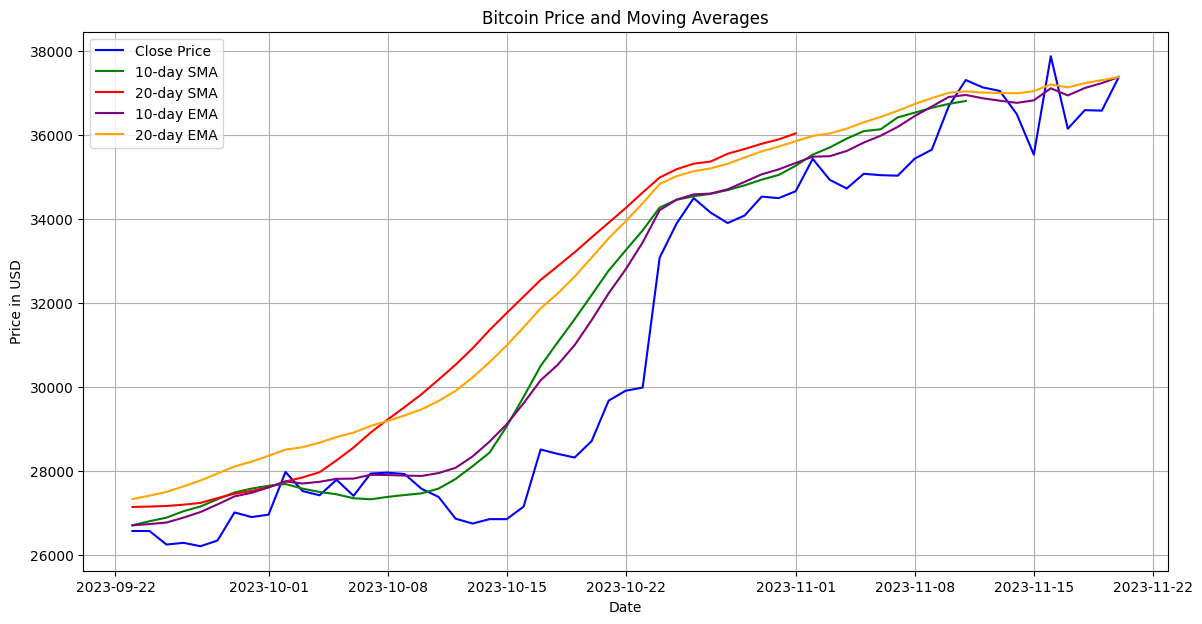

In [ ]:
# Moving Averages - SMA and EMA
bitcoin_data['SMA_10'] = bitcoin_data['close'].rolling(window=10).mean()  # 10-day Simple Moving Average
bitcoin_data['SMA_20'] = bitcoin_data['close'].rolling(window=20).mean()  # 20-day Simple Moving Average
bitcoin_data['EMA_10'] = bitcoin_data['close'].ewm(span=10, adjust=False).mean()  # 10-day Exponential Moving Average
bitcoin_data['EMA_20'] = bitcoin_data['close'].ewm(span=20, adjust=False).mean()  # 20-day Exponential Moving Average

# Plotting the Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['timestamp'], bitcoin_data['close'], label='Close Price', color='blue')
plt.plot(bitcoin_data['timestamp'], bitcoin_data['SMA_10'], label='10-day SMA', color='green')
plt.plot(bitcoin_data['timestamp'], bitcoin_data['SMA_20'], label='20-day SMA', color='red')
plt.plot(bitcoin_data['timestamp'], bitcoin_data['EMA_10'], label='10-day EMA', color='purple')
plt.plot(bitcoin_data['timestamp'], bitcoin_data['EMA_20'], label='20-day EMA', color='orange')

plt.title('Bitcoin Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()


## Regression

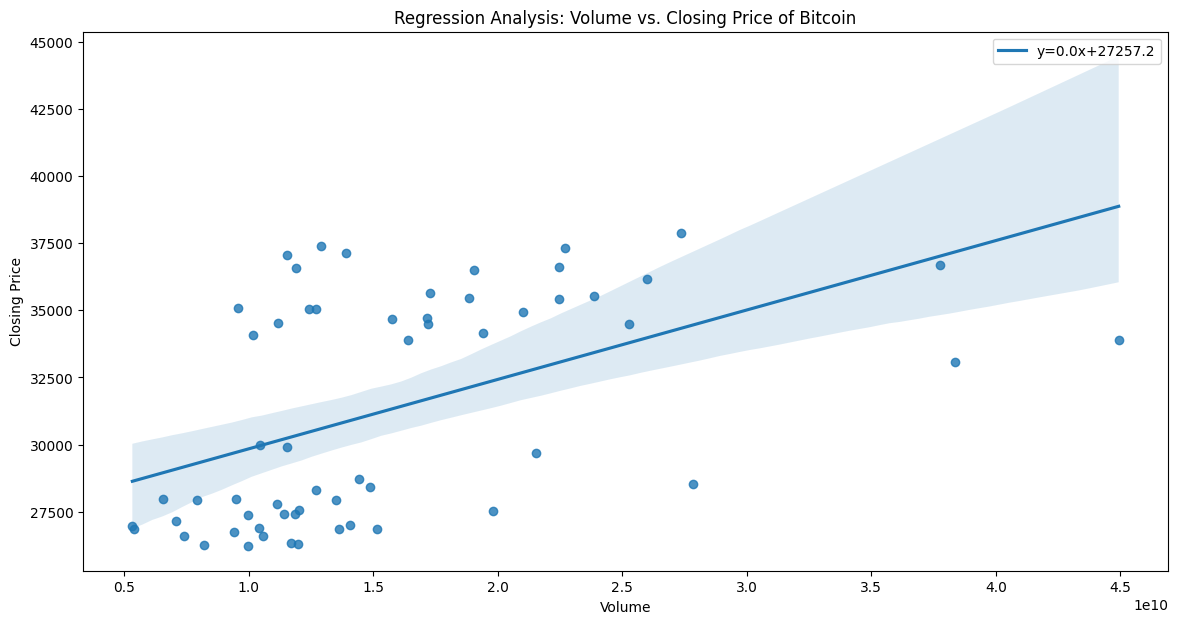

('Closing Price = $0.00 * Volume + 27257.24$', 0.24982212767225445)

In [ ]:
import seaborn as sns
from scipy import stats

# Regression Analysis - Volume vs. Closing Price
slope, intercept, r_value, p_value, std_err = stats.linregress(bitcoin_data['volume'], bitcoin_data['close'])

# Scatter plot with regression line
plt.figure(figsize=(14, 7))
sns.regplot(x='volume', y='close', data=bitcoin_data, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

plt.title('Regression Analysis: Volume vs. Closing Price of Bitcoin')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Outputting the regression equation and the R-squared value
regression_equation = f"Closing Price = ${slope:.2f} * Volume + {intercept:.2f}$"
r_squared = r_value ** 2

regression_equation, r_squared


The regression analysis between Bitcoin's volume and closing price is visualized in the scatter plot with a regression line. The regression equation is:

$Closing  Price=0.001 ×Volume+27,234.55$

The very small coefficient for volume (rounded to 0.00) suggests a relatively weak direct impact of volume on the closing price in this linear model.

The $R^2$
  value, which measures the proportion of the variance in the closing price that can be explained by the volume, is approximately 0.255. This indicates that around 25.5% of the variability in Bitcoin's closing price can be explained by its trading volume, according to this linear model.

This analysis provides insights into the relationship between these two variables, but it's important to remember that correlation does not imply causation, and other factors could be influencing both the volume and price of Bitcoin.